In [ ]:
!pip install pydotplus

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import os
from graphviz import Source

#     :::PRUEBAS:::
from pydotplus import graph_from_dot_data
from IPython.display import Image

# Lectura Datos

In [3]:
data = pd.read_csv("TEST 0.csv",delimiter=";")
data.head()

estu_consecutivo.1 estu_exterior  periodo estu_tieneetnia  \
0   SB11201320218705            NO    20183              No   
1   SB11201220483104            NO    20183              No   
2   SB11201320115727           NaN    20152             NaN   
3   SB11201210035597            NO    20173              No   
4   SB11201320132366            NO    20173              No   

  estu_tomo_cursopreparacion estu_cursodocentesies estu_cursoiesapoyoexterno  \
0                        NaN                   NaN                       NaN   
1                        NaN                   NaN                       NaN   
2                         No         No tomó Curso             No tomó Curso   
3                        NaN                   NaN                       NaN   
4                        NaN                   NaN                       NaN   

  estu_cursoiesexterna estu_simulacrotipoicfes estu_actividadrefuerzoareas  \
0                  NaN                     NaN                         NaN   
1                  NaN                     NaN                         NaN   
2        No tomó curso                      No                          No   
3                  NaN                     NaN                         NaN   
4                  NaN                     NaN                         NaN   

   ... punt_quimica punt_fisica punt_ciencias_sociales punt_filosofia  \
0  ...         41.0        37.0                   46.0           40.0   
1  ...         46.0        47.0                   40.0           34.0   
2  ...         53.0        41.0                   44.0           45.0   
3  ...         35.0        42.0                   36.0           41.0   
4  ...         50.0        46.0                   52.0           44.0   

   punt_ingles desemp_ingles                    profundiza puntaje_prof  \
0         56.0            A2    PUNT_PROFUNDIZA_MATEMATICA          6.0   
1         42.0            A-  PUNT_INTERDISC_VIOLENCIAYSOC         41.0   
2         45.0            A1  PUNT_INTERDISC_MEDIOAMBIENTE         51.0   
3         43.0            A-  PUNT_INTERDISC_VIOLENCIAYSOC         51.0   
4         52.0            A1      PUNT_PROFUNDIZA_LENGUAJE          6.0   

  desemp_prof  exito  
0          II      0  
1         NaN      0  
2         NaN      0  
3         NaN      0  
4          II      1  

[5 rows x 78 columns]

In [5]:
#Dastos del DataFrame
data.shape

(5000, 78)

In [6]:
data.exito.replace({0:"No Aprobado",1:"Aprobado"},inplace=True)

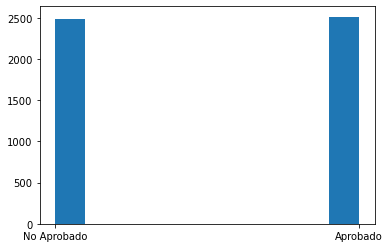

In [7]:
#Histograma de Casos de Exito
plt.hist(data.exito)
plt.show()

In [8]:
data.exito.unique()

array(['No Aprobado', 'Aprobado'], dtype=object)

In [9]:
colnames = data.columns.values.tolist()
colnames

['estu_consecutivo.1',
 'estu_exterior',
 'periodo',
 'estu_tieneetnia',
 'estu_tomo_cursopreparacion',
 'estu_cursodocentesies',
 'estu_cursoiesapoyoexterno',
 'estu_cursoiesexterna',
 'estu_simulacrotipoicfes',
 'estu_actividadrefuerzoareas',
 'estu_actividadrefuerzogeneric',
 'fami_trabajolaborpadre',
 'fami_trabajolabormadre',
 'fami_numlibros',
 'estu_inst_cod_departamento',
 'estu_tipodocumento.1',
 'estu_nacionalidad.1',
 'estu_genero.1',
 'estu_fechanacimiento.1',
 'periodo.1',
 'estu_estudiante.1',
 'estu_pais_reside.1',
 'estu_depto_reside.1',
 'estu_cod_reside_depto.1',
 'estu_mcpio_reside.1',
 'estu_cod_reside_mcpio.1',
 'estu_areareside',
 'estu_valorpensioncolegio',
 'fami_educacionpadre.1',
 'fami_educacionmadre.1',
 'fami_ocupacionpadre.1',
 'fami_ocupacionmadre.1',
 'fami_estratovivienda.1',
 'fami_nivelsisben',
 'fami_pisoshogar',
 'fami_tieneinternet.1',
 'fami_tienecomputador.1',
 'fami_tienemicroondas',
 'fami_tienehorno',
 'fami_tieneautomovil.1',
 'fami_tienedvd'

In [10]:
#Variable Objetivo -> Exito
#Predictoras -> puntaje
target = colnames[-1]
predictors = colnames[65:73]
predictors

['punt_lenguaje',
 'punt_matematicas',
 'punt_biologia',
 'punt_quimica',
 'punt_fisica',
 'punt_ciencias_sociales',
 'punt_filosofia',
 'punt_ingles']

In [11]:
#75% -> Entrenar
#25% -> Validar
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

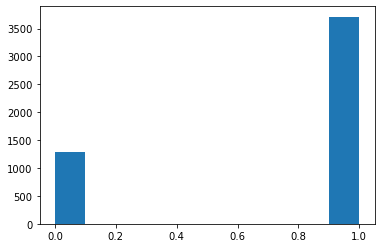

In [12]:
#Validar -> 1250
#Entrenar -> 3750
plt.hist(data.is_train.astype(np.int))
plt.show()

In [13]:
train,test = data[data["is_train"]==True],data[data["is_train"]==False]

In [14]:
#min_samples_split -> Minimo de muestras para formar
    #el árbol

tree = DecisionTreeClassifier(criterion="gini",
                             max_depth=4,
                              min_samples_split=20,
                              random_state=1)
#Modelado
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=1)

In [15]:
#predecir del 25%
preds = tree.predict(test[predictors])

In [16]:
# Datos actual del datset vs prediccion del modelo
pd.crosstab(test[target],preds,rownames=["Actual"],
           colnames=["Predictions"])

Predictions  Aprobado  No Aprobado
Actual                            
Aprobado          466          145
No Aprobado       142          535

# Visualización del Árbol de Decisión

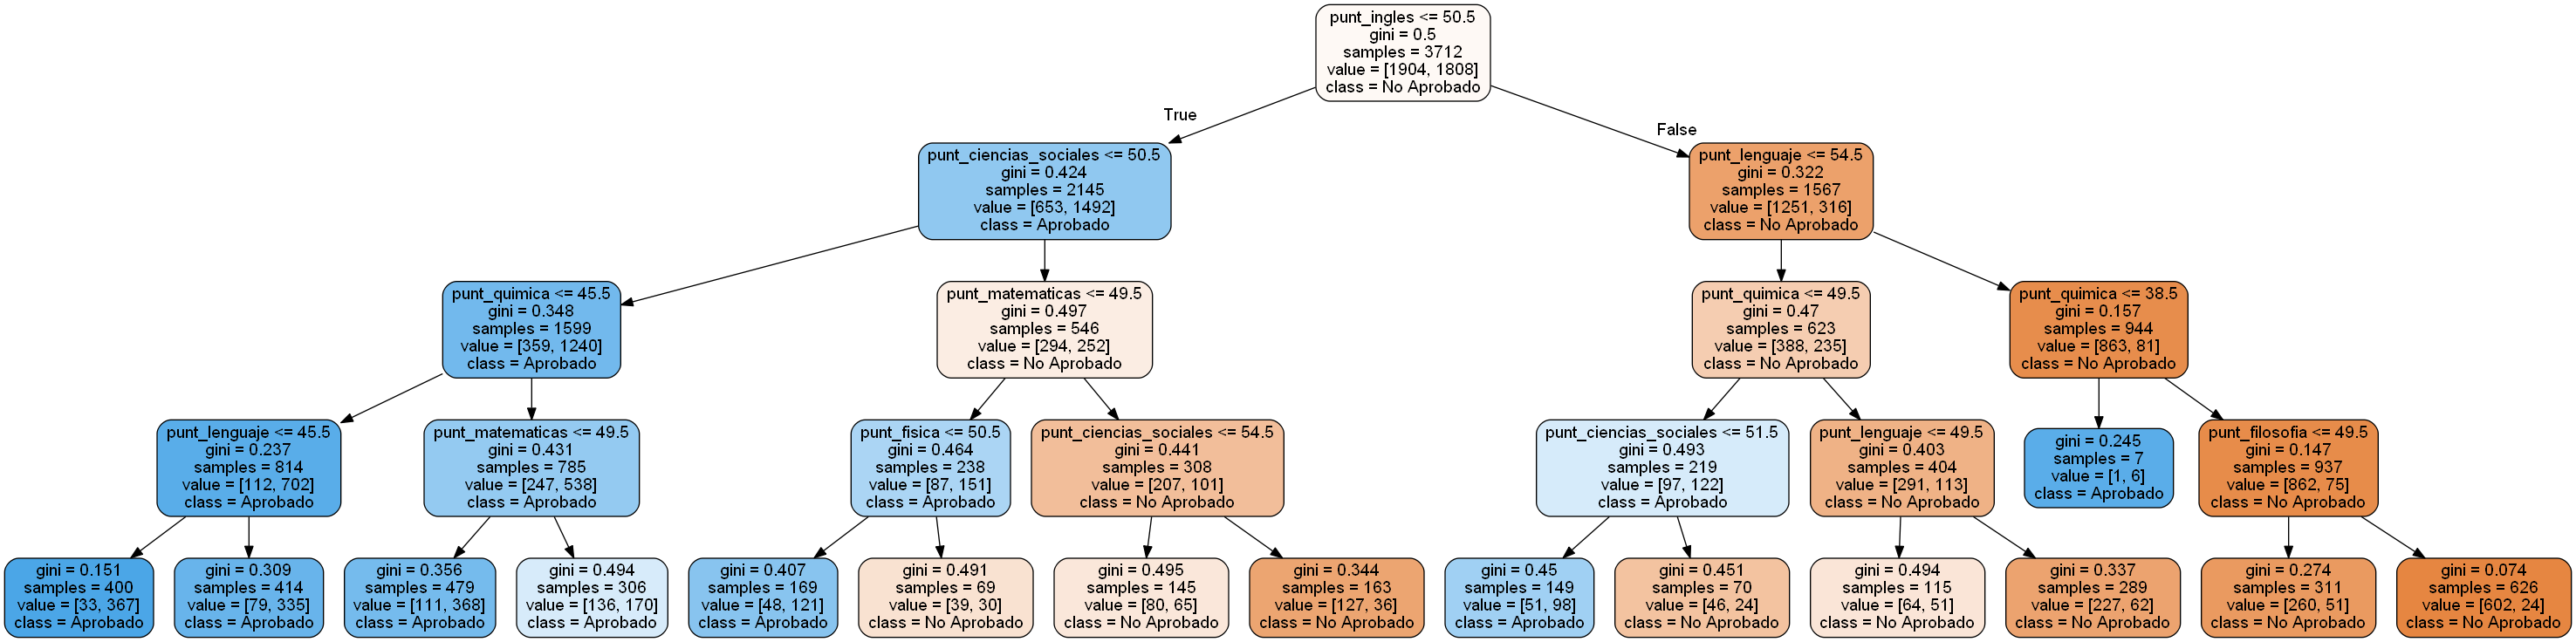

In [21]:
#
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = export_graphviz(tree,out_file=None,
                          filled=True,rounded=True,
                          class_names=["No Aprobado",
                                      "Aprobado"],
                          feature_names=predictors)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")
Image(graph.create_png())

# Cross Validation para la Poda

In [31]:
x = data[predictors]
y = data[target]
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5,
                             min_samples_split=20,
                             random_state=99)
tree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [34]:
from sklearn.model_selection import KFold

In [36]:
cv = KFold(n_splits=10,shuffle=True,random_state=1)

In [37]:
from sklearn.model_selection import cross_val_score

In [43]:
scores=np.mean(cross_val_score(tree,x,y,scoring="accuracy",cv=cv,
                              n_jobs=1))
scores
score = np.mean(scores)
scores

0.769

In [45]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=i,
                                 min_samples_split=20,random_state=99)
    tree.fit(x,y)
    cv = KFold(n_splits=10,shuffle=True,random_state=1)
    Scores = cross_val_score(tree,x,y,scoring="accuracy",cv=cv,n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i,"es de: ",score)
    print(" ",tree.feature_importances_)

Score para i =  1 es de:  0.769
  [0. 0. 0. 0. 0. 0. 0. 1.]
Score para i =  2 es de:  0.769
  [0.11237937 0.         0.         0.17625995 0.         0.
 0.         0.71136067]
Score para i =  3 es de:  0.769
  [0.1378436  0.         0.         0.1527714  0.         0.07173039
 0.02109049 0.61656413]
Score para i =  4 es de:  0.769
  [0.1402843  0.025785   0.         0.16365262 0.         0.07860159
 0.01922902 0.57244747]
Score para i =  5 es de:  0.769
  [0.13184732 0.03994676 0.03160888 0.15437967 0.00427203 0.07969632
 0.02361643 0.53463258]
Score para i =  6 es de:  0.769
  [0.12880232 0.05312418 0.03457776 0.15118201 0.0142762  0.07732425
 0.03861035 0.50210293]
Score para i =  7 es de:  0.769
  [0.12785335 0.06039784 0.04039309 0.14663486 0.02328302 0.08992504
 0.04459038 0.46692242]
Score para i =  8 es de:  0.769
  [0.12576828 0.06672275 0.04165    0.14530617 0.02951367 0.09737957
 0.05285574 0.44080382]
Score para i =  9 es de:  0.769
  [0.12344682 0.07664374 0.05607902 0.145

# Arboles de Regresión con Python

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
regtree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,
                               random_state=0)
regtree.fit(x,y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [47]:
preds = regtree.predict(data[predictors])
preds

array([0.        , 0.        , 0.54545455, ..., 0.72222222, 0.        ,
       0.51724138])

In [62]:
data["preds"]= preds
data[["preds","exito"]]

preds  exito
0     0.000000      0
1     0.000000      0
2     0.545455      0
3     0.000000      0
4     0.947368      1
...        ...    ...
4995  1.000000      1
4996  1.000000      1
4997  0.722222      1
4998  0.000000      0
4999  0.517241      0

[5000 rows x 2 columns]

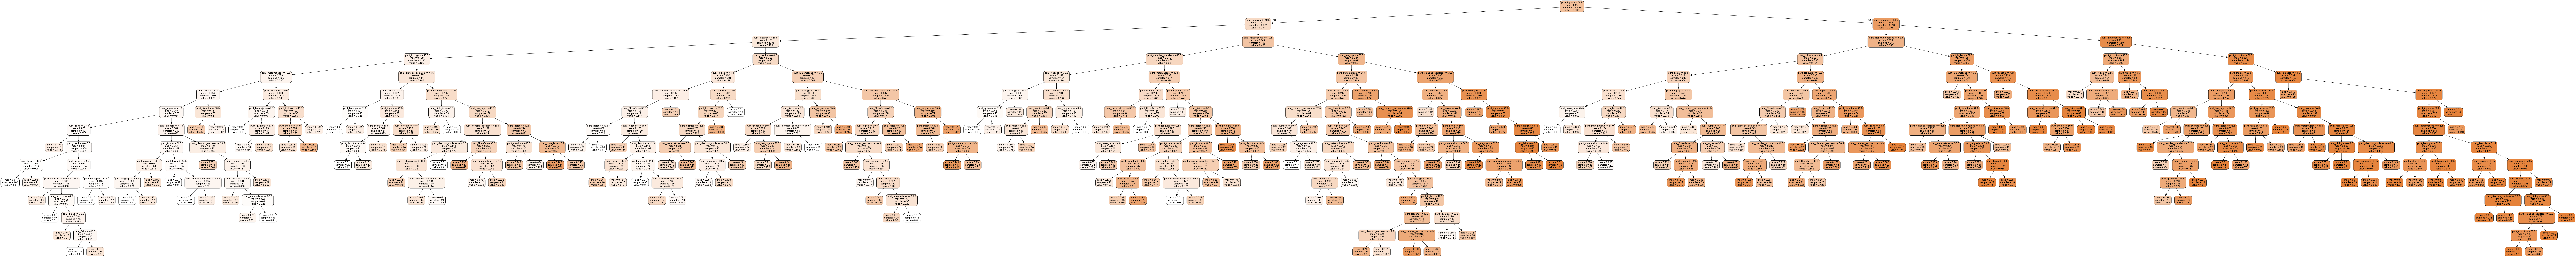

In [51]:
#
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data_regtree = export_graphviz(regtree,out_file=None,
                          filled=True,rounded=True,
                          class_names=["No Aprobado",
                                      "Aprobado"],
                          feature_names=predictors)
graph_regtree = graph_from_dot_data(dot_data_regtree)
graph_regtree.write_png("regtree.png")
Image(graph_regtree.create_png())

In [52]:
cv = KFold(n_splits=10,shuffle=True,random_state=1)
print(scores)
score_1 = np.mean(scores)
print(score_1)
regtree.feature_importances_

0.769
0.769


array([0.12302763, 0.0753952 , 0.02854404, 0.12197591, 0.03712136,
       0.07173685, 0.05148052, 0.49071849])

# Random Forest para Regresión

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
forest = RandomForestRegressor(n_jobs=2,oob_score=True,
                               n_estimators=10)
forest.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

In [67]:
data["rforest_pred"]=forest.oob_prediction_
data[["rforest_pred","exito"]]

rforest_pred  exito
0             0.00      0
1             0.00      0
2             0.40      0
3             0.00      0
4             1.00      1
...            ...    ...
4995          1.00      1
4996          1.00      1
4997          0.00      1
4998          0.20      0
4999          0.75      0

[5000 rows x 2 columns]

In [69]:
data["rforest_error2"] = (data["rforest_pred"]-data["exito"])**2
sum(data["rforest_error2"])/len(data)

0.20906582653061087

In [70]:
forest.oob_score_

0.16370658731469434

# Random Forest para clasificación

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=10)
forest.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(n_estimators=10, n_jobs=2, oob_score=True)

In [73]:
forest.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ]])

In [74]:
forest.oob_score_

0.7368